# Data Science Project
## Name: ANKUR SINGH
## Batch: 10722
---
### Data: Police Dataset
---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time,datetime

In [ ]:
data = pd.read_csv("/content/Police Data.csv")
data.head() # Print first 5 Data from the dataset 

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
data.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [ ]:
# Convert stop_date and stop_time columns from object to date-
data['stop_date'] = pd.to_datetime(data.stop_date, errors ='coerce')
data['stop_time'] = pd.to_datetime(data.stop_time, errors ='coerce')

In [ ]:
data.dtypes

stop_date             datetime64[ns]
stop_time             datetime64[ns]
country_name                 float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
dtype: object

In [ ]:
data.describe()

,country_name,driver_age_raw,driver_age
count,0.0,61481.000000,61228.000000
mean,NaN,1967.791106,34.148984
std,NaN,121.050106,12.760710
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1978.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


In [ ]:
data.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [ ]:
# Removing country_name column because of NaN values
data.drop(columns = 'country_name', inplace = True)

In [ ]:
data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,2022-10-28 01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,2022-10-28 08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,2022-10-28 23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,2022-10-28 17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,2022-10-28 10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,2012-12-06,2022-10-28 17:54:00,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,2012-12-06,2022-10-28 22:22:00,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,2012-12-06,2022-10-28 23:20:00,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,2012-12-07,2022-10-28 00:23:00,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [ ]:
# search_conducted for each age group for both gender
pd.pivot_table(data,index=['driver_gender','violation'])

driver_age  driver_age_raw  \
driver_gender violation                                         
F             Equipment             31.470588     1977.091039   
              Moving violation      34.001872     1971.832400   
              Other                 34.073009     1966.455947   
              Registration/plates   32.610143     1973.362342   
              Speeding              32.164394     1973.645644   
M             Equipment             31.740857     1975.620508   
              Moving violation      37.336482     1964.068275   
              Other                 41.302149     1904.604986   
              Registration/plates   32.674953     1973.813160   
              Seat belt             30.333333     1981.666667   
              Speeding              33.765928     1971.522593   

                                   drugs_related_stop  search_conducted  
driver_gender violation                                                  
F             Equipment                      0.007880          0.058739  
              Moving violation               0.008870          0.043417  
              Other                          0.006608          0.057269  
              Registration/plates            0.004747          0.099684  
              Speeding                       0.001711          0.008728  
M             Equipment                      0.023633          0.089258  
              Moving violation               0.014002          0.061018  
              Other                          0.005433          0.044423  
              Registration/plates            0.017381          0.140286  
              Seat belt                      0.000000          0.000000  
              Speeding                       0.006231          0.027198

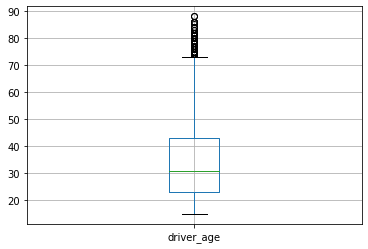

In [ ]:
# data visualization for driver_age
data.boxplot('driver_age')

In [ ]:
# how many male and female drivers
data['driver_gender'].value_counts()

M    45164
F    16310
Name: driver_gender, dtype: int64

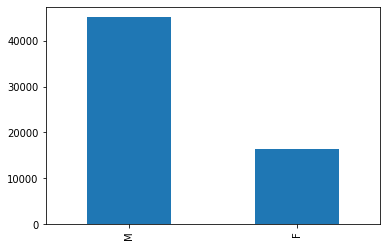

In [ ]:
data.driver_gender.value_counts().plot.bar()

In [ ]:
# Which Gender is doing more violations on the basis of speeding
data[data.violation == 'Speeding'].driver_gender.value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

In [ ]:
# Number of search conducted by the Police
data.search_conducted.value_counts()

False    63056
True      2479
Name: search_conducted, dtype: int64

In [ ]:
# When search_conducted is True.
data[data.search_conducted == True].search_type.value_counts()

Incident to Arrest                                          1074
Probable Cause                                               579
Inventory                                                    173
Reasonable Suspicion                                         149
Protective Frisk                                             126
Incident to Arrest,Inventory                                 104
Incident to Arrest,Probable Cause                             79
Probable Cause,Reasonable Suspicion                           38
Incident to Arrest,Protective Frisk                           31
Incident to Arrest,Inventory,Probable Cause                   26
Probable Cause,Protective Frisk                               23
Inventory,Probable Cause                                      14
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Incident to Arrest,Probable Cause,Protective Frisk            10
Protective Frisk,Reasonab

In [ ]:
# search conducted on the drivers
data.groupby('driver_gender').search_conducted.sum()

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

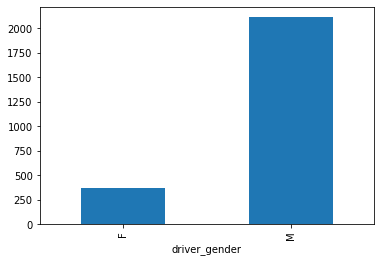

In [ ]:
data.groupby(['driver_gender'])['search_conducted'].sum().plot.bar()

In [ ]:
# Drug activity of both gender
pd.DataFrame(data.groupby('driver_gender').drugs_related_stop.value_counts())

drugs_related_stop
driver_gender drugs_related_stop                    
F             False                            16254
              True                                56
M             False                            44702
              True                               462

In [ ]:
# Number of search conducted by the Police on the basis of 'True' drugs activity
data.groupby('driver_gender').drugs_related_stop.sum()

driver_gender
F     56
M    462
Name: drugs_related_stop, dtype: int64

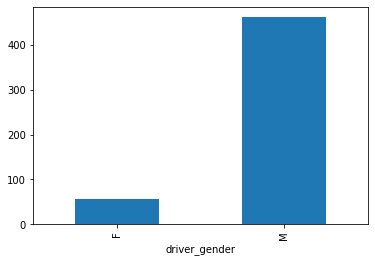

In [ ]:
data.groupby(['driver_gender'])['drugs_related_stop'].sum().plot.bar()

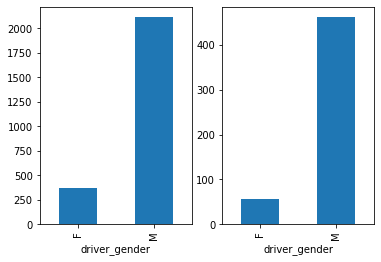

In [ ]:
plt.subplot(1,2,1)
data.groupby(['driver_gender'])['search_conducted'].sum().plot.bar()
plt.subplot(1,2,2)
data.groupby(['driver_gender'])['drugs_related_stop'].sum().plot.bar()

###### #min,max,avg age of both gender violations and how many cases for each age on the basis of violation

In [ ]:
pd.pivot_table(data,index=['driver_gender','violation'],values=['driver_age'],aggfunc=[np.mean,np.max,np.min,len])

mean       amax       amin        len
                                  driver_age driver_age driver_age driver_age
driver_gender violation                                                      
F             Equipment            31.470588       73.0       16.0       1396
              Moving violation     34.001872       82.0       15.0       2142
              Other                34.073009       73.0       17.0        454
              Registration/plates  32.610143       69.0       16.0        632
              Speeding             32.164394       84.0       16.0      11686
M             Equipment            31.740857       81.0       16.0       5120
              Moving violation     37.336482       86.0       15.0       9784
              Other                41.302149       86.0       16.0       3129
              Registration/plates  32.674953       74.0       16.0       1611
              Seat belt            30.333333       42.0       23.0          3
              Speeding             33.765928       88.0       15.0      25517

In [ ]:
# how many arrested on each date
data.groupby('stop_date').is_arrested.value_counts()

stop_date   is_arrested
2005-01-02  False           1
2005-01-18  False           1
2005-01-23  False           1
2005-02-20  True            1
2005-03-14  False           1
                           ..
2012-12-03  False          18
2012-12-04  False          25
2012-12-05  False          17
2012-12-06  False          30
2012-12-07  False           1
Name: is_arrested, Length: 4090, dtype: int64

In [ ]:
# which time police is active
data['stop_time'].mean()

Timestamp('2022-10-28 12:03:32.504463360')

In [ ]:
# Avg,min, max age of the drivers 
data.groupby('driver_gender').driver_age.agg(['min','max','mean'])

,min,max,mean
driver_gender,,,
F,15.0,84.0,32.416528
M,15.0,88.0,34.777138


In [ ]:
# what type of action is taken by police for each date
data.groupby('stop_date').stop_outcome.value_counts()

stop_date   stop_outcome 
2005-01-02  Citation          1
2005-01-18  Citation          1
2005-01-23  Citation          1
2005-02-20  Arrest Driver     1
2005-03-14  Citation          1
                             ..
2012-12-05  No Action         1
2012-12-06  Citation         26
            Warning           3
            N/D               1
2012-12-07  Citation          1
Name: stop_outcome, Length: 5965, dtype: int64

In [ ]:
# Warnings given by police as stop_outcome
warning_data = data[data['stop_outcome']=='Warning']
warning_data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
99,2005-10-03,2022-10-28 08:37:00,M,1965.0,40.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
108,2005-10-03,2022-10-28 17:00:00,M,1961.0,44.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,30+ Min,False
168,2005-10-06,2022-10-28 06:30:00,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
260,2005-10-09,2022-10-28 16:00:00,F,1978.0,27.0,Black,Registration Violation,Registration/plates,False,NaN,Warning,False,0-15 Min,False
281,2005-10-10,2022-10-28 12:05:00,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65490,2012-12-05,2022-10-28 10:46:00,M,1991.0,21.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
65499,2012-12-05,2022-10-28 23:13:00,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,True,Probable Cause,Warning,False,0-15 Min,True
65514,2012-12-06,2022-10-28 10:37:00,M,1988.0,24.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
65520,2012-12-06,2022-10-28 12:43:00,M,1953.0,59.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False


In [ ]:
# warning cases for male and female
warning_data.groupby('driver_gender').stop_outcome.value_counts()

driver_gender  stop_outcome
F              Warning          517
M              Warning         1372
Name: stop_outcome, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

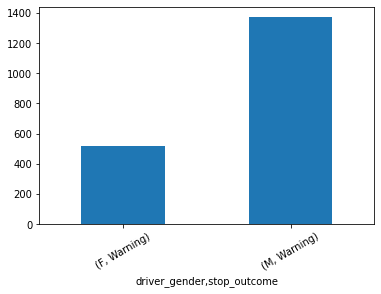

In [ ]:
warning_data.groupby(['driver_gender'])['stop_outcome'].value_counts().plot.bar()
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

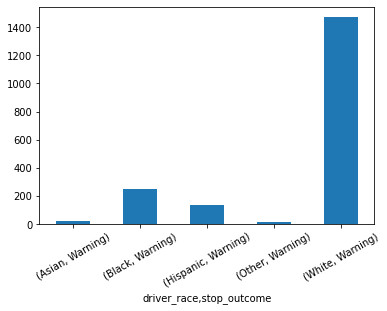

In [ ]:
# Warning cases by driver race
warning_data.groupby('driver_race').stop_outcome.value_counts()
warning_data.groupby(['driver_race'])['stop_outcome'].value_counts().plot.bar()
plt.xticks(rotation=30)

In [ ]:
# Number of male and female for each violation
pd.crosstab(data['driver_gender'],data['violation'],margins = True)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,All
driver_gender,,,,,,,
F,1396,2142,454,632,0,11686,16310
M,5120,9784,3129,1611,3,25517,45164
All,6516,11926,3583,2243,3,37203,61474


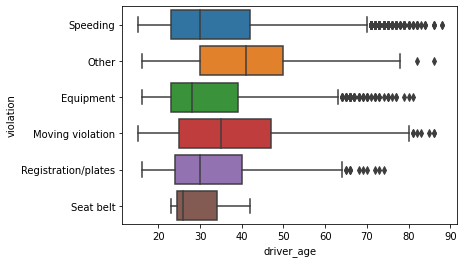

In [ ]:
sns.boxplot(data=data, x=data.driver_age, y=data.violation)

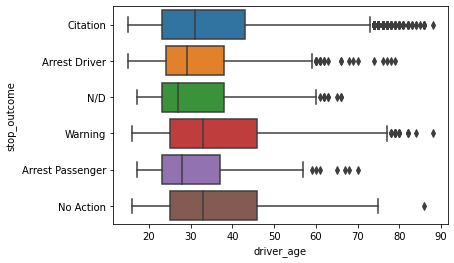

In [ ]:
sns.boxplot(data=data, x=data.driver_age, y=data.stop_outcome)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f090910c110>,
      dtype=object)

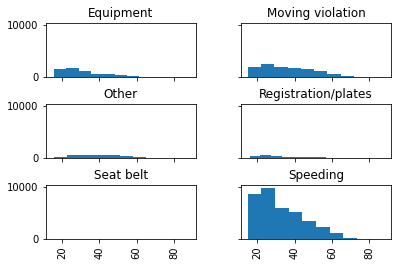

In [ ]:
data.hist('driver_age', by='violation', sharex=True, sharey=True)

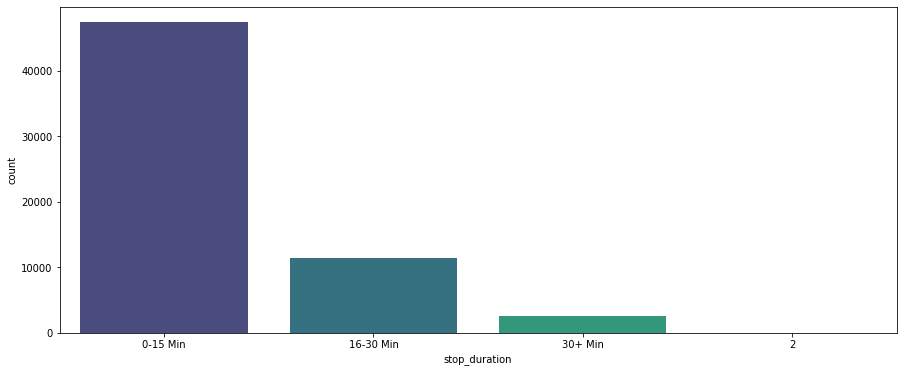

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data['stop_duration'],order = data['stop_duration'].value_counts().index, palette = 'viridis')

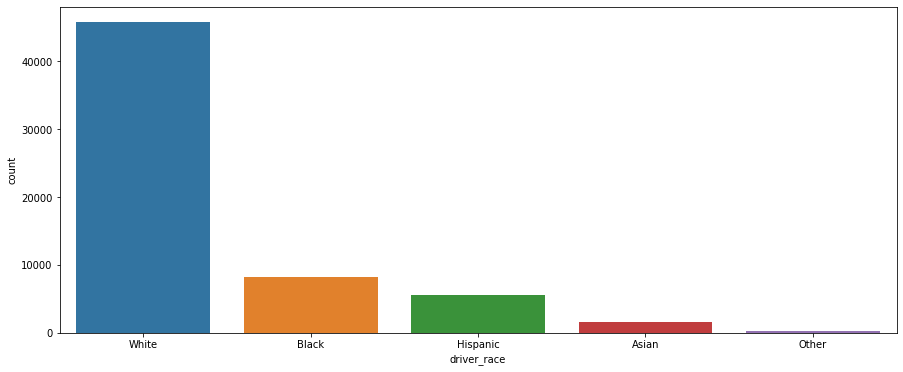

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data['driver_race'],order = data['driver_race'].value_counts().index)

In [ ]:
# which race of the people are doing more violations
data.groupby('driver_race').violation.value_counts()

driver_race  violation          
Asian        Speeding                1173
             Moving violation         242
             Equipment                130
             Other                     65
             Registration/plates       29
Black        Speeding                3658
             Moving violation        2076
             Equipment               1262
             Other                    767
             Registration/plates      503
             Seat belt                  1
Hispanic     Speeding                2062
             Moving violation        1543
             Equipment               1069
             Other                    469
             Registration/plates      467
             Seat belt                  1
Other        Speeding                 125
             Moving violation          49
             Other                     21
             Equipment                 15
             Registration/plates        1
White        Speeding               30186
 

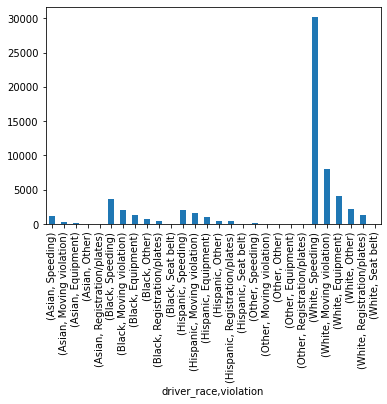

In [ ]:
data.groupby(['driver_race'])['violation'].value_counts().plot.bar()

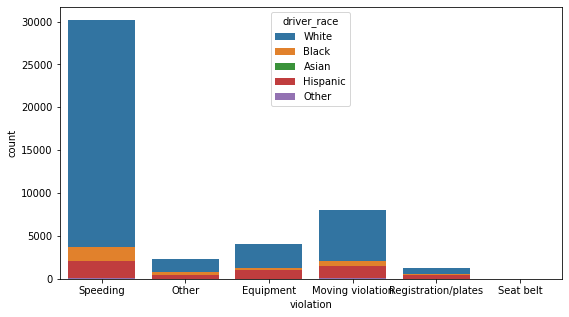

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(data = data, x='violation' , hue='driver_race',dodge=False)
# Better plot for the violation done by different race of the people

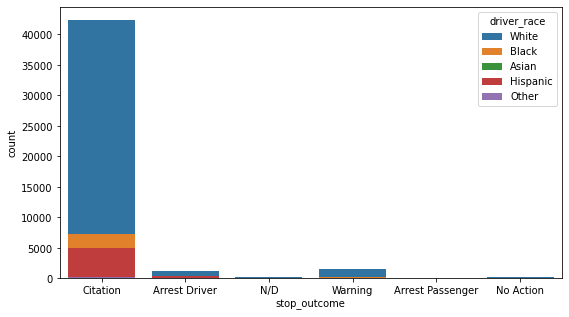

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(data = data, x='stop_outcome' , hue='driver_race',dodge=False)

In [ ]:
# Analysis on White driver race people
white_data = data[data['driver_race']=='White']
white_data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,2022-10-28 01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,2022-10-28 08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,2022-10-28 23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,2022-10-28 17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,2022-10-28 10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65528,2012-12-06,2022-10-28 15:39:00,M,1987.0,25.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65529,2012-12-06,2022-10-28 16:00:00,M,1994.0,18.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65530,2012-12-06,2022-10-28 17:54:00,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,2012-12-06,2022-10-28 22:22:00,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False


Citation            4243900
Warning              147100
Arrest Driver        118900
N/D                   28700
No Action             23100
Arrest Passenger      13000
Name: stop_outcome, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

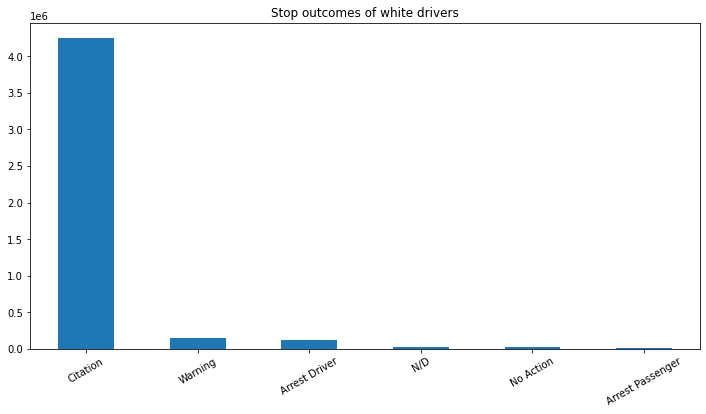

In [ ]:
white_outcome = white_data['stop_outcome'].value_counts() * 100
print(white_outcome)
white_outcome.plot(kind='bar',figsize=(12,6), title='Stop outcomes of white drivers')
plt.xticks(rotation=30)

Speeding               3018600
Moving violation        801600
Equipment               404000
Other                   226100
Registration/plates     124300
Seat belt                  100
Name: violation, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

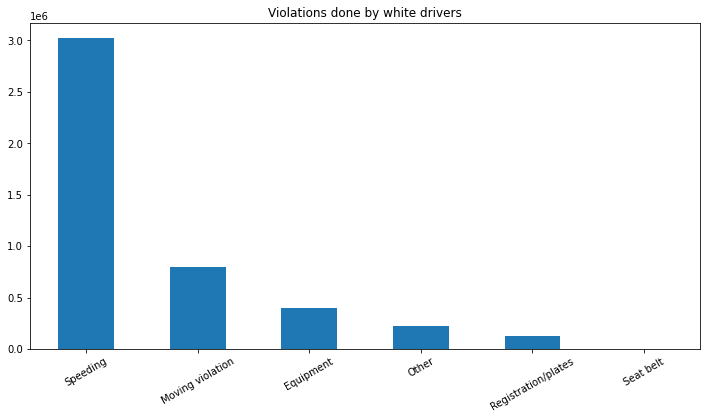

In [ ]:
# Violations done by white people
white_violation = white_data['violation'].value_counts() * 100
print(white_violation)
white_violation.plot(kind='bar',figsize=(12,6),title='Violations done by white drivers')
plt.xticks(rotation=30)

In [ ]:
# Analysis on Black driver race people
black_data = data[data['driver_race']=='Black']
black_data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
5,2005-03-23,2022-10-28 09:45:00,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
8,2005-07-13,2022-10-28 10:15:00,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
22,2005-08-08,2022-10-28 02:09:00,M,1955.0,50.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,30+ Min,False
30,2005-09-26,2022-10-28 12:09:00,M,1959.0,46.0,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,30+ Min,False
64,2005-10-01,2022-10-28 20:00:00,M,1972.0,33.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65477,2012-12-04,2022-10-28 16:13:00,M,1991.0,21.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65485,2012-12-05,2022-10-28 01:26:00,M,1992.0,20.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65497,2012-12-05,2022-10-28 20:24:00,F,1960.0,52.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,16-30 Min,False
65499,2012-12-05,2022-10-28 23:13:00,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,True,Probable Cause,Warning,False,0-15 Min,True


Citation            734500
Arrest Driver        46400
Warning              24800
N/D                   8400
Arrest Passenger      8100
No Action             4500
Name: stop_outcome, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

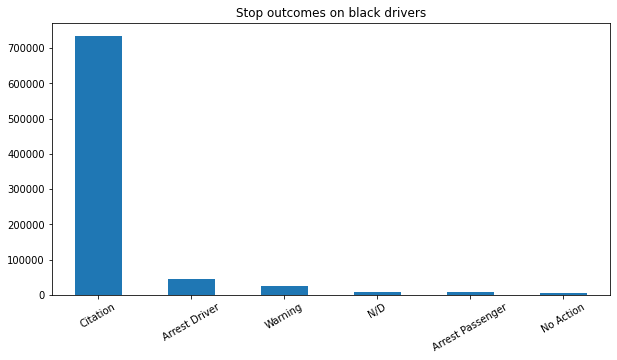

In [ ]:
black_outcome = black_data['stop_outcome'].value_counts()*100
print(black_outcome)
black_outcome.plot(kind='bar',figsize=(10,5),title='Stop outcomes on black drivers')
plt.xticks(rotation=30)

Speeding               365800
Moving violation       207600
Equipment              126200
Other                   76700
Registration/plates     50300
Seat belt                 100
Name: violation, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

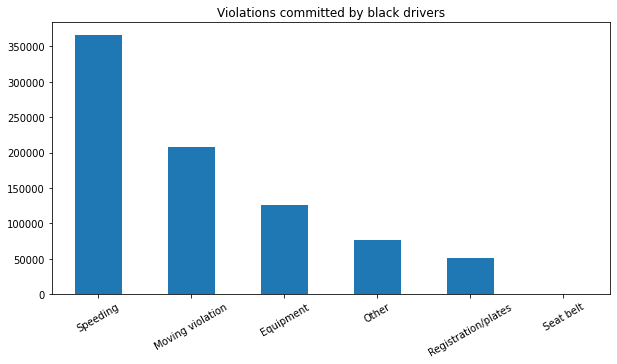

In [ ]:
black_violation = black_data['violation'].value_counts() * 100
print(black_violation)
black_violation.plot(kind='bar',figsize=(10,5),title='Violations committed by black drivers')
plt.xticks(rotation=30)

In [ ]:
# Analysis on hispanic driver race people
hispanic_data = data[data['driver_race']=='Hispanic']
hispanic_data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
42,2005-10-01,2022-10-28 00:50:00,M,1977.0,28.0,Hispanic,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,30+ Min,False
198,2005-10-07,2022-10-28 00:50:00,M,1973.0,32.0,Hispanic,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,16-30 Min,False
320,2005-10-11,2022-10-28 21:55:00,M,1977.0,28.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
339,2005-10-12,2022-10-28 20:30:00,M,1987.0,18.0,Hispanic,Other Traffic Violation,Moving violation,True,Protective Frisk,Arrest Driver,True,0-15 Min,False
340,2005-10-12,2022-10-28 20:30:00,M,1987.0,18.0,Hispanic,Other Traffic Violation,Moving violation,True,Protective Frisk,Arrest Driver,True,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65506,2012-12-06,2022-10-28 05:51:00,M,1986.0,26.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65511,2012-12-06,2022-10-28 08:45:00,M,1964.0,48.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65514,2012-12-06,2022-10-28 10:37:00,M,1988.0,24.0,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
65519,2012-12-06,2022-10-28 11:40:00,F,1985.0,27.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False


Citation            502000
Arrest Driver        32800
Warning              13500
No Action             5100
N/D                   4200
Arrest Passenger      3500
Name: stop_outcome, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

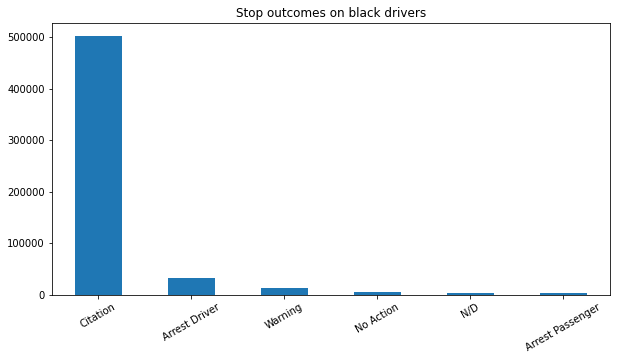

In [ ]:
hispanic_outcome = hispanic_data['stop_outcome'].value_counts()*100
print(hispanic_outcome)
hispanic_outcome.plot(kind='bar',figsize=(10,5),title='Stop outcomes on black drivers')
plt.xticks(rotation=30)

Speeding               206200
Moving violation       154300
Equipment              106900
Other                   46900
Registration/plates     46700
Seat belt                 100
Name: violation, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

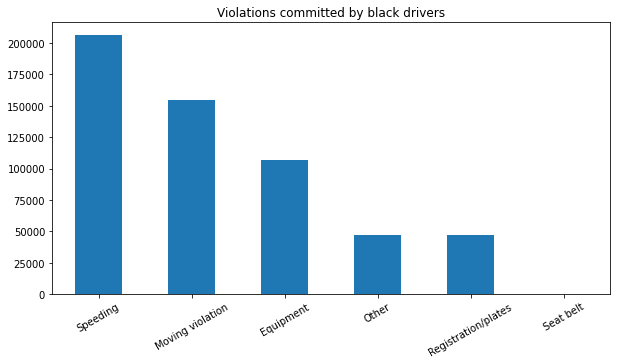

In [ ]:
hispanic_violation = hispanic_data['violation'].value_counts() * 100
print(hispanic_violation)
hispanic_violation.plot(kind='bar',figsize=(10,5),title='Violations committed by black drivers')
plt.xticks(rotation=30)

array(['0-15 Min', '16-30 Min', '30+ Min', nan, '2'], dtype=object)

array([ 8., 23., 45., nan])

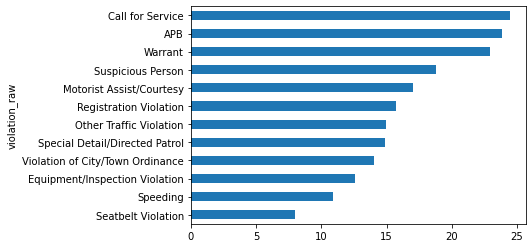

In [ ]:
display(data.stop_duration.unique())
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45} 
data['stop_minutes'] = data.stop_duration.map(mapping) # Convert the 'stop_duration' strings to integers using the 'mapping'
display(data['stop_minutes'].unique())
# Calculate mean 'stop_minutes' for each value in 'violation_raw'
stop_length = data.groupby('violation_raw')['stop_minutes'].mean()
stop_length.sort_values().plot(kind='barh')
plt.show()

In [ ]:
data.stop_minutes.value_counts()

8.0     47379
23.0    11448
45.0     2647
Name: stop_minutes, dtype: int64

In [ ]:
data.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 23.882353
Call for Service                    24.437579
Equipment/Inspection Violation      12.554174
Motorist Assist/Courtesy            17.007246
Other Traffic Violation             14.962683
Registration Violation              15.734284
Seatbelt Violation                   8.000000
Special Detail/Directed Patrol      14.882081
Speeding                            10.863348
Suspicious Person                   18.763158
Violation of City/Town Ordinance    14.070588
Warrant                             22.900000
Name: stop_minutes, dtype: float64

In [ ]:
data.groupby('violation_raw').stop_minutes.agg(['count', 'mean'])

,count,mean
violation_raw,,
APB,51,23.882353
Call for Service,793,24.437579
Equipment/Inspection Violation,6516,12.554174
Motorist Assist/Courtesy,138,17.007246
Other Traffic Violation,11925,14.962683
Registration Violation,2243,15.734284
Seatbelt Violation,3,8.000000
Special Detail/Directed Patrol,2383,14.882081
Speeding,37204,10.863348


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

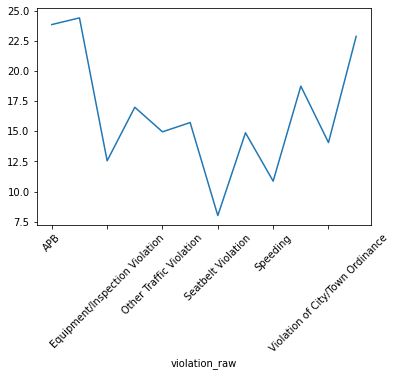

In [ ]:
data.groupby('violation_raw').stop_minutes.mean().plot()
plt.xticks(rotation = 45)

In [ ]:
data['Year_month'] = data['stop_date'].apply(lambda x: x.strftime('%Y-%m'))
data['Year_month']

0        2005-01
1        2005-01
2        2005-01
3        2005-02
4        2005-03
          ...   
65530    2012-12
65531    2012-12
65532    2012-12
65533    2012-12
65534    2012-12
Name: Year_month, Length: 65535, dtype: object

In [ ]:
data = pd.DataFrame(data.groupby('Year_month').count().reset_index())

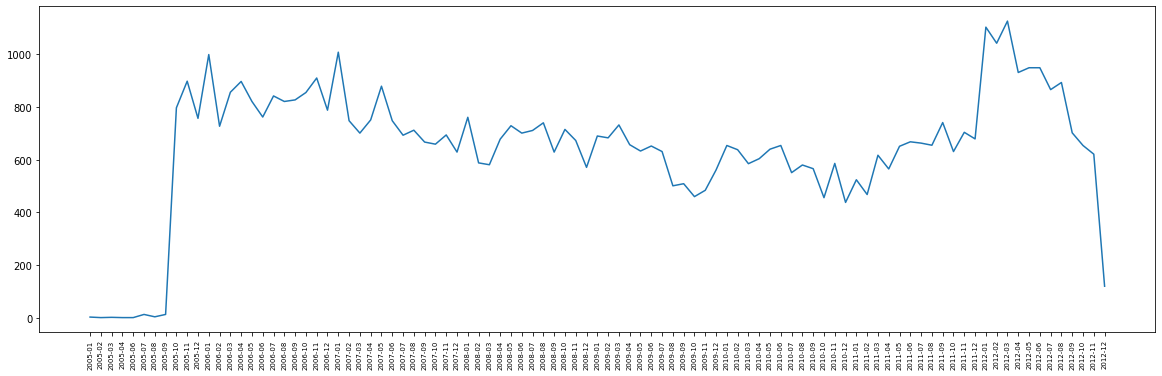

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(data['Year_month'],data['driver_age'])
plt.xticks(rotation='vertical', size=7)
plt.show()